In [1]:
import numpy
import py_entropy
from matplotlib import pyplot

# Diffusion

Here we setup an $n=50$ site system with open boundaries. We then run for 1000 alternating layers and plot the occupancy probability distribution $\mathbb{P}_i$ with darker shading indicating later time steps. Red is the very last state.

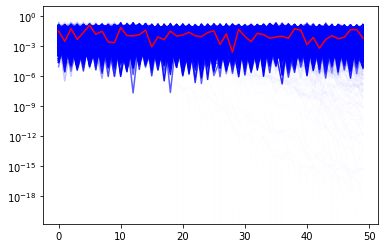

In [2]:
# Make an initial state
n = 50
s = py_entropy.SingleDefectState(numpy.asarray([1.0] + [0]*(n-1), dtype="complex128"))

k = 10000
for i in range(k):
    pyplot.plot(abs(s.get_state())**2,c='b',alpha=(i+1)/k)
    s.apply_layer(i%2 == 1, periodic_boundaries=False)
pyplot.plot(abs(s.get_state())**2,c='r')

pyplot.yscale('log')
pyplot.show()

# Unitarity

Lets check that everything is unitary, sum the total error of $\langle \psi \vert \psi \rangle^2 - 1$

In [3]:
%%time

s = py_entropy.ThreadedSingleDefectStates(10000, numpy.asarray([1.0] + [0]*(n-1), dtype="complex128"))
s.apply_alternative_layers(k, periodic_boundaries=False)

print("Total unitarity error: {}".format(sum(abs((abs(s.get_state())**2).sum(axis=1) - 1))))

Total unitarity error: 3.3811509148051755e-11
CPU times: user 14min 4s, sys: 19 s, total: 14min 23s
Wall time: 36.2 s


# Purity

Now we look at the state purity over time:
$$F_k = \sum_s \vert \langle s \vert \psi_k \rangle \vert^4 - \frac{2}{D}\sum_{s'>s} \vert \langle s' \vert \psi_k \rangle \vert^2 \vert \langle s \vert \psi_k \rangle \vert^2$$

With $k$ the layer depth, we plot this over $k$ for a single run.

1.0


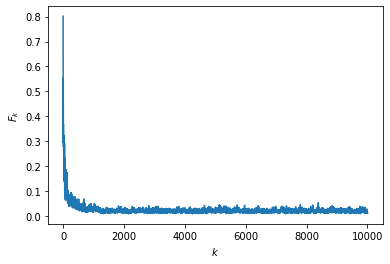

In [4]:
s = py_entropy.SingleDefectState(numpy.asarray([1.0] + [0]*(n-1), dtype="complex128"))
print(s.get_purity())
purities = s.apply_alternative_layers_and_save_purity(k, periodic_boundaries=False)

pyplot.plot(purities)
pyplot.xlabel('$k$')
pyplot.ylabel('$F_k$')
pyplot.show()

Now lets average the purity over $10,000$ samples with $n=50$ and $k=10000$

In [5]:
%%time

s = py_entropy.ThreadedSingleDefectStates(10000, numpy.asarray([1.0] + [0]*49, dtype="complex128"))
purities = s.apply_alternative_layers_and_save_mean_purity(k, periodic_boundaries=False)

CPU times: user 11min 31s, sys: 8.53 s, total: 11min 39s
Wall time: 29.3 s


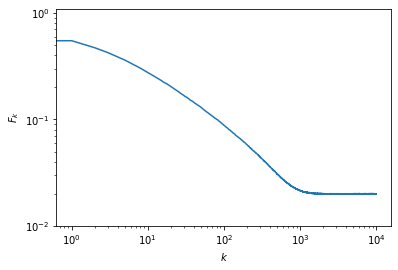

In [6]:
pyplot.plot(purities)
pyplot.xlabel('$k$')
pyplot.ylabel('$F_k$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.ylim([1e-2,1.1])
pyplot.show()